# Predicting Airline Delays
useful resources:
- kaggle dataset: https://www.kaggle.com/datasets/jimschacko/airlines-dataset-to-predict-a-delay/data
- jupyter notebook in vscode: https://code.visualstudio.com/docs/datascience/jupyter-notebooks 
- colorpaletts: https://r-graph-gallery.com/38-rcolorbrewers-palettes.html
- more colors: https://matplotlib.org/stable/gallery/color/named_colors.html
- Seaborn documentation: https://seaborn.pydata.org/tutorial.html

# Import Libraries and Data
Load nescessary libraries and data into the dataset ds

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import randint
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Import Data into Dataframe
df = pd.read_csv('Airlines.csv')
df.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0


# Display and analyze Data

## Basics

<b>Column definition</b>
- id - Unique row identifier ID
- Airline - Abreviated name of different commericial airlines
- Flight - type of aircraft
- AirportFrom - origin airport
- AirportTo - destination airport
- DayOfWeek - day of the week
- Time - Time of flight in minutes from midnight
- Length - Length of flight in minutes
- Delay - delay or not

In [3]:
df.describe()

,id,Flight,DayOfWeek,Time,Length,Delay
count,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000
mean,269692.000000,2427.928630,3.929668,802.728963,132.202007,0.445442
std,155706.604461,2067.429837,1.914664,278.045911,70.117016,0.497015
min,1.000000,1.000000,1.000000,10.000000,0.000000,0.000000
25%,134846.500000,712.000000,2.000000,565.000000,81.000000,0.000000
50%,269692.000000,1809.000000,4.000000,795.000000,115.000000,0.000000
75%,404537.500000,3745.000000,5.000000,1035.000000,162.000000,1.000000
max,539383.000000,7814.000000,7.000000,1439.000000,655.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           539383 non-null  int64 
 1   Airline      539383 non-null  object
 2   Flight       539383 non-null  int64 
 3   AirportFrom  539383 non-null  object
 4   AirportTo    539383 non-null  object
 5   DayOfWeek    539383 non-null  int64 
 6   Time         539383 non-null  int64 
 7   Length       539383 non-null  int64 
 8   Delay        539383 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 37.0+ MB


Method isna() identifies missing values in a dataset and returns a boolean. <br>
It's equivalent to isnull().

In [5]:
df.isna().sum()

id             0
Airline        0
Flight         0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Time           0
Length         0
Delay          0
dtype: int64

Number of unique entries per collumn

In [6]:
unique_counts = df.nunique()
print(unique_counts)

id             539383
Airline            18
Flight           6585
AirportFrom       293
AirportTo         293
DayOfWeek           7
Time             1131
Length            426
Delay               2
dtype: int64


## Exploratory Data Analysis - EDA
Analysis the different features. <br>
How do the features relate to a flight being delayed? <br>
The data has not been normalized or preprocessed in any way yet

In [7]:
copy_eda = df.copy()

#### Delay or no Delay

Average delay rate of all flight: 0.4454


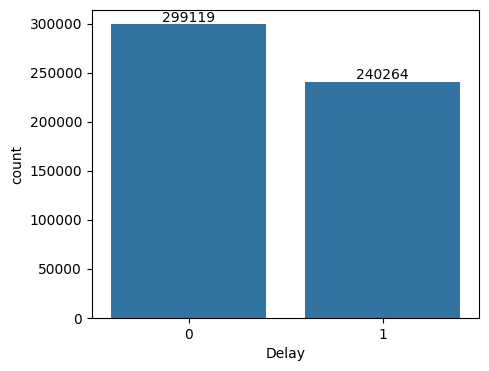

In [8]:
# Barplot: total number of flights on-time and flights delayed
plt.figure(figsize=(5, 4))
ax = sns.countplot(x='Delay', data=copy_eda)
for container in ax.containers:
    ax.bar_label(container)

# average delay rate of all flights
print('Average delay rate of all flight:', copy_eda.Delay.mean().round(4))

#### Airline
Numbers of flights overall, flights delayed and not delayed per airline. <br>
Ratio of delay

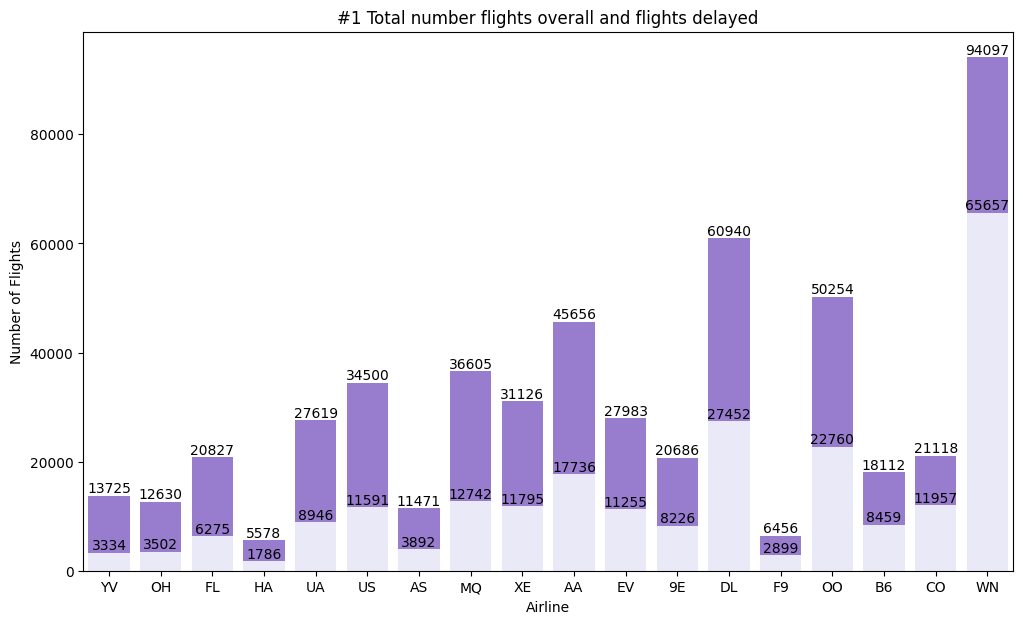

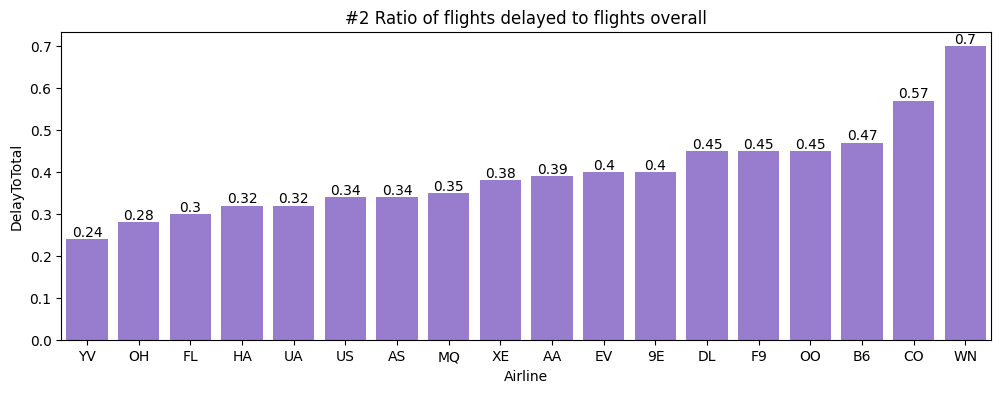

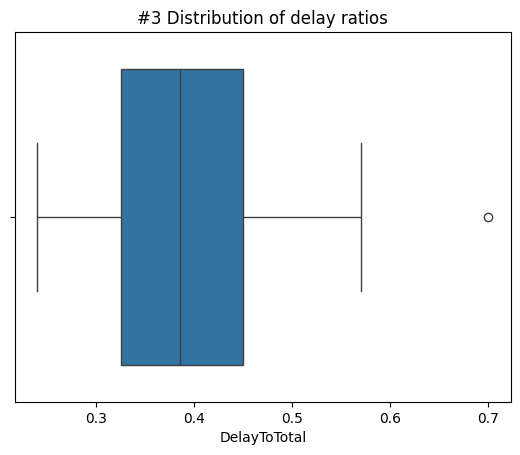

In [9]:
# Group ds_copy to analyze relation between Airline and Delay
airline_delay = (copy_eda.groupby('Airline')['Delay']
           .value_counts(normalize=False)
           .unstack(fill_value=0)
           .rename(columns={0: 'OnTime', 1: 'Delayed'}))

# Calculate Total of flights per airline
airline_delay['Total'] = airline_delay['OnTime'] + airline_delay['Delayed']

# Calculate Delay_Ratio of flights delayed to total flights
airline_delay['DelayToTotal'] = (airline_delay['Delayed'] / airline_delay['Total']).round(2)

# Sort dataset by Delay_Ratio
airline_delay = airline_delay.sort_values(by='DelayToTotal')

#1 Barplot with total numbers of flights and delayed flights
plt.figure(figsize=(12, 7))
ax = sns.barplot(x= 'Airline', y='Total', data = airline_delay, color='mediumpurple')
sns.barplot(x = 'Airline', y='Delayed', data = airline_delay, color='lavender')
for container in ax.containers:
    ax.bar_label(container)
plt.title('#1 Total number flights overall and flights delayed')
plt.ylabel('Number of Flights')
plt.show()

#2 Number of delayed flights relative to all flights
plt.figure(figsize=(12, 4))
ax = sns.barplot(x='Airline', y='DelayToTotal', data=airline_delay, color='mediumpurple')
for container in ax.containers:
    ax.bar_label(container)
plt.title('#2 Ratio of flights delayed to flights overall')
plt.show()

#3 distribution of delay ratios
sns.boxplot(data=airline_delay, x='DelayToTotal')
plt.title('#3 Distribution of delay ratios')
plt.show()

In [10]:
airline_delay.DelayToTotal.describe()

count    18.000000
mean      0.397222
std       0.109588
min       0.240000
25%       0.325000
50%       0.385000
75%       0.450000
max       0.700000
Name: DelayToTotal, dtype: float64

<b> Interpretation </b> <br>
- Most delayed airlines: WN, CO (More delays than punctual flights; delay ratio > 0.5)
- WN is an outlier: Double amount of delayed flights to punctual flights (65657/28440 = 2,31)
- Airlines with more flights tend to have higher total numbers of delay and also ratio of delays. But the distribution is quite mixed

#### Flight
Flight has 6585 unique entries, so I'm going to generalize a bit.

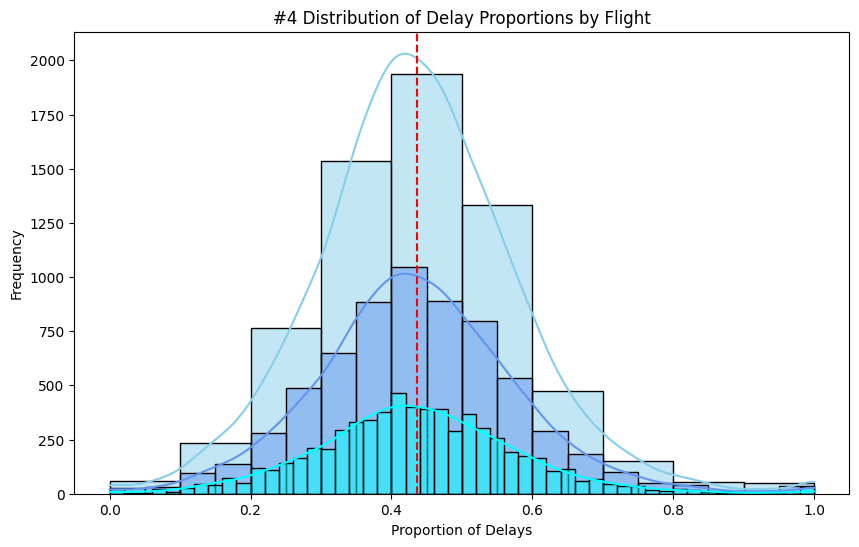

count    6585.000000
mean        0.436370
std         0.145368
min         0.000000
25%         0.346535
50%         0.431034
75%         0.522613
max         1.000000
Name: Delay, dtype: float64


In [11]:
#4 Proportion of delays by flight
flight_delay = copy_eda.groupby('Flight')['Delay'].mean()  
plt.figure(figsize=(10, 6))
sns.histplot(flight_delay, kde=True, bins=10, color='skyblue')
sns.histplot(flight_delay, kde=True, bins=20, color='cornflowerblue')
sns.histplot(flight_delay, kde=True, bins=50, color='aqua')

# Vertical line for arithmetic mean of flight_delays
plt.axvline(flight_delay.mean(), 0, 2000, color='Red', linestyle = "dashed")
plt.title("#4 Distribution of Delay Proportions by Flight")
plt.xlabel("Proportion of Delays")
plt.ylabel("Frequency")
plt.show()

print(flight_delay.describe())

In [12]:
print('Number of flights that are always delayed:', sum(flight_delay >= 1))
print('Number of flights that are always on time:', sum(flight_delay == 0))

Number of flights that are always delayed: 33
Number of flights that are always on time: 22


<b> Interpretation </b> <br>
- Outliers at both ends of the spectrum: some flights are always delayed and others are never delayed.
- Distribution is symmetrical, with both mean and median around 43%
- low standard deviation (0.145) indicates that most flights have delay proportions close to the mean. The data is tightly clustered around the average. 

#### Day of the week

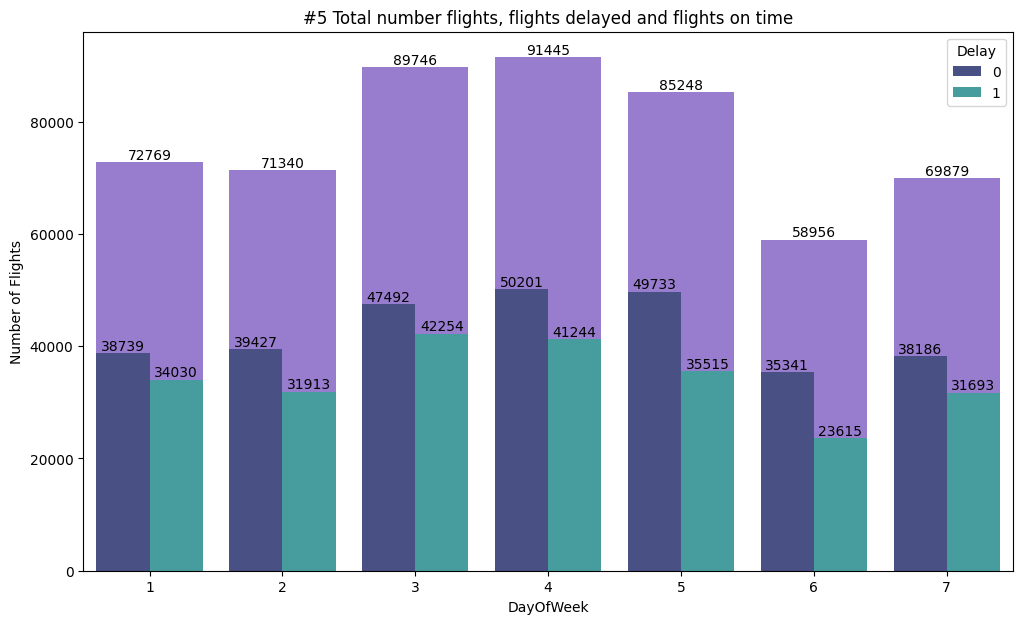

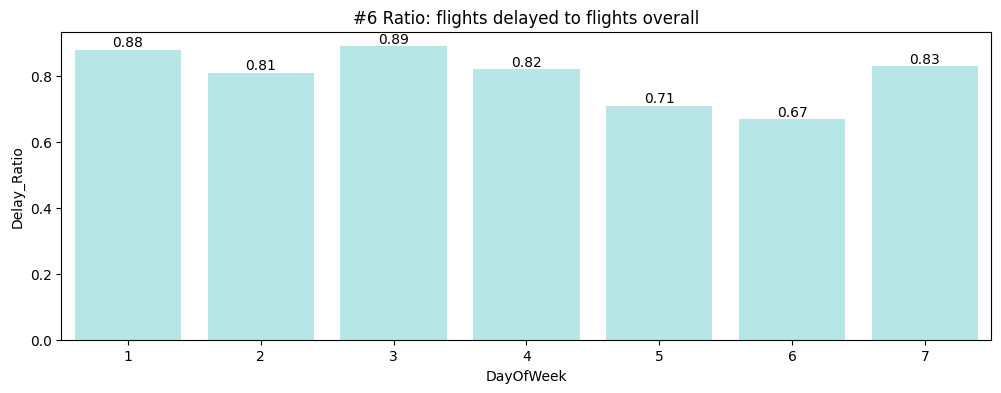

In [15]:
# Group ds_copy to analyze relation between Airline and Delay
grouped = copy_eda.groupby('DayOfWeek')['Delay'].value_counts().unstack(fill_value=0)
grouped['Sum'] = grouped[1] + grouped[0]
grouped['Delay_Ratio'] = (grouped[1] / grouped[0]).round(2)

# Sort dataset by Delay_Ratio
grouped = grouped.sort_values(by='Delay_Ratio')

#5 Barplot with total numbers of flights and delayed flights
plt.figure(figsize=(12, 7))
ax = sns.barplot(x= 'DayOfWeek', y='Sum', data = grouped, color='mediumpurple')
sns.countplot(x = 'DayOfWeek', hue= 'Delay', palette='mako', data = copy_eda)
for container in ax.containers:
    ax.bar_label(container)

plt.title('#5 Total number flights, flights delayed and flights on time')
plt.ylabel('Number of Flights')
plt.show()

#6 Ratio of delayed flights to all flights
plt.figure(figsize=(12, 4))
ax = sns.barplot(x='DayOfWeek', y='Delay_Ratio', data=grouped, color='paleturquoise')
for container in ax.containers:
    ax.bar_label(container)
plt.title('#6 Ratio: flights delayed to flights overall')
plt.show()

##### A bit experimental
The following cells contain code (just as a markdown instead of code cell), but I don't know if its useful.

#Compare flight volume with delay proportions by Day of the Week
flight_volume = ds_copy['DayOfWeek'].value_counts().sort_index()
avg_delay = ds_copy.groupby('DayOfWeek')['Delay'].mean()
#print(flight_volume, avg_delay)
plt.figure(figsize=(5, 3))
sns.scatterplot(x=flight_volume.values, y=avg_delay.values, hue=flight_volume.index, palette="viridis")

plt.title("Flight Volume vs. Delay Proportions by Day of Week")
plt.xlabel("Flight Volume")
plt.ylabel("Proportion of Delays")
plt.legend(title="Day of Week")
plt.show()

#Delay Proportions by Airline and Day of Week
plt.figure(figsize=(15, 6))
sns.catplot(data=ds_copy, x="DayOfWeek", y="Delay", hue="Airline", kind="bar", height=6, aspect=2, palette="Spectral")
plt.title("Delay Proportions by Airline and Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Proportion of Delays")
plt.show()

#### AirportFrom

Distribution of Flight per AirportFrom

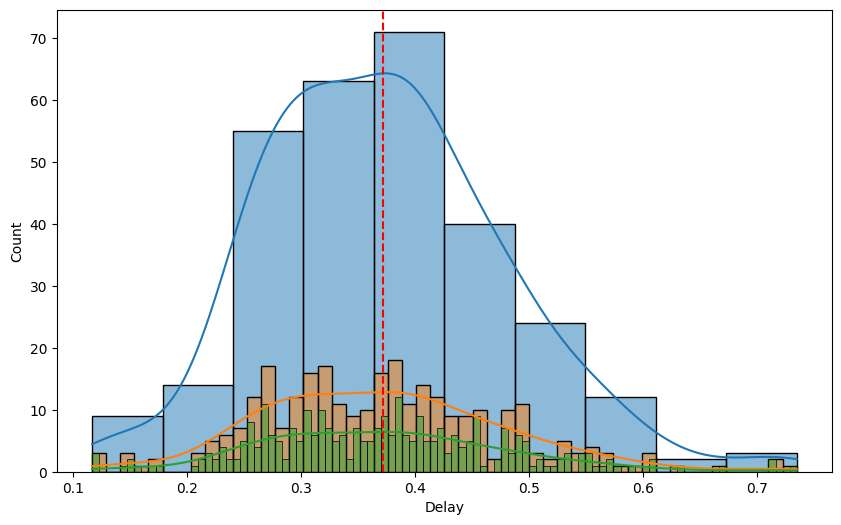

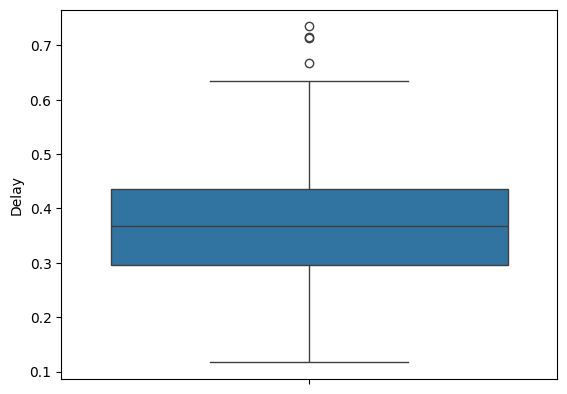

In [16]:
# Generalized proportion of delays by AirportFrom
airport_from_delay = copy_eda.groupby('AirportFrom')['Delay'].mean() 
plt.figure(figsize=(10, 6))
sns.histplot(airport_from_delay, kde=True, bins=10)
sns.histplot(airport_from_delay, kde=True, bins=50)
sns.histplot(airport_from_delay, kde=True, bins=100)
plt.axvline(airport_from_delay.mean(), 0, 2000, color='Red', linestyle = "dashed")
plt.show()

sns.boxplot(airport_from_delay)
plt.show()

In [17]:
# Get Top delayed airports
print('Most delayed', airport_from_delay.sort_values(ascending=False).head(5))

# Get Least delayed airports
print('\nLeast delayed', airport_from_delay.tail(5))
print('\nDescription', airport_from_delay.describe())

Most delayed AirportFrom
MDW    0.735182
DAL    0.715998
OAK    0.712926
HOU    0.667195
OTH    0.634409
Name: Delay, dtype: float64

Least delayed AirportFrom
VPS    0.331754
WRG    0.305085
XNA    0.281028
YAK    0.157895
YUM    0.278107
Name: Delay, dtype: float64

Description count    293.000000
mean       0.371925
std        0.106768
min        0.116883
25%        0.296296
50%        0.368473
75%        0.436744
max        0.735182
Name: Delay, dtype: float64


#### AirportTo

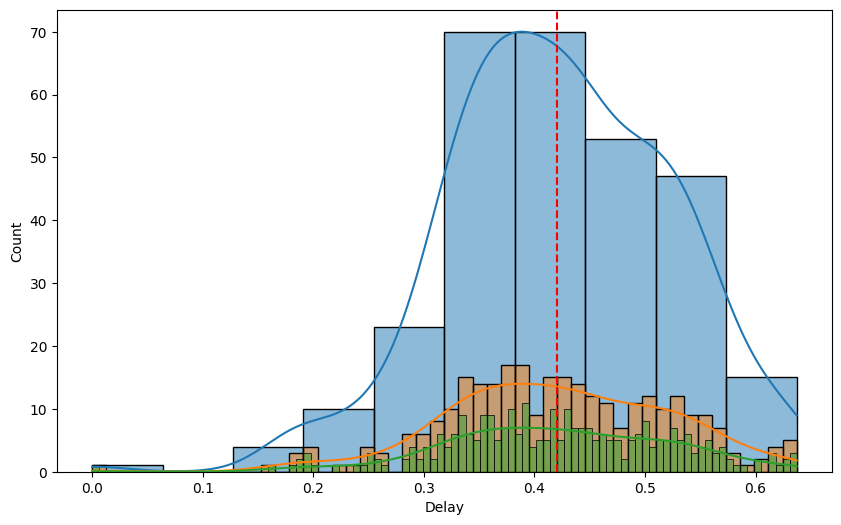

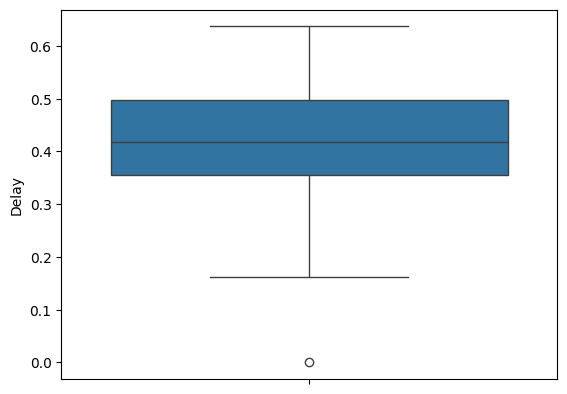

In [18]:
# Generalized proportion of delays by AirportFrom
airport_to_delay = copy_eda.groupby('AirportTo')['Delay'].mean() 
plt.figure(figsize=(10, 6))
sns.histplot(airport_to_delay, kde=True, bins=10)
sns.histplot(airport_to_delay, kde=True, bins=50)
sns.histplot(airport_to_delay, kde=True, bins=100)
plt.axvline(airport_to_delay.mean(), 0, 2000, color='Red', linestyle = "dashed")
plt.show()

sns.boxplot(airport_to_delay)
plt.show()

In [19]:
# Get Top delayed airports
print('Most delayed', airport_to_delay.sort_values(ascending=False).head(5))

# Get Least delayed airports
print('\nLeast delayed', airport_to_delay.tail(5))
print('\nDescription', airport_to_delay.describe())

Most delayed AirportTo
OAK    0.637133
RDD    0.633333
ONT    0.630983
MDW    0.626021
ISP    0.625990
Name: Delay, dtype: float64

Least delayed AirportTo
VPS    0.371248
WRG    0.355932
XNA    0.360641
YAK    0.298246
YUM    0.254438
Name: Delay, dtype: float64

Description count    293.000000
mean       0.420808
std        0.100399
min        0.000000
25%        0.354839
50%        0.418182
75%        0.497726
max        0.637133
Name: Delay, dtype: float64


#### AirportFrom → AirportTo

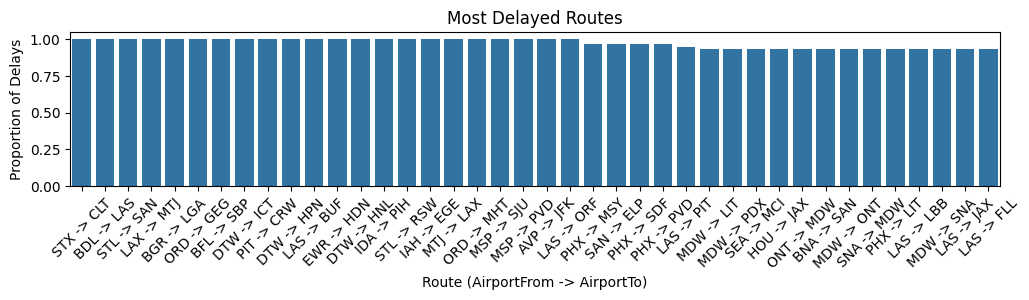

In [20]:
# Mean delay by route (AirportFrom -> AirportTo)
route_delays = copy_eda.groupby(['AirportFrom', 'AirportTo'])['Delay'].mean().sort_values(ascending=False)

# Prepare data for plotting
route_delays_df = route_delays.head(40).reset_index()
route_delays_df['Route'] = route_delays_df['AirportFrom'] + ' -> ' + route_delays_df['AirportTo']

# Bar plot of the most delayed routes
plt.figure(figsize=(12, 2))
sns.barplot(data=route_delays_df, x='Route', y='Delay')

# Add titles and labels
plt.title('Most Delayed Routes')
plt.xlabel('Route (AirportFrom -> AirportTo)')
plt.ylabel('Proportion of Delays')
plt.xticks(rotation=45)
plt.show()

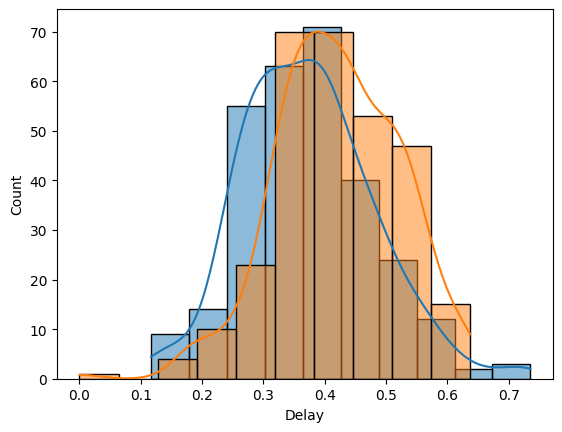

In [21]:
sns.histplot(airport_from_delay, kde=True, bins=10)
sns.histplot(airport_to_delay, kde=True, bins=10)
plt.show()

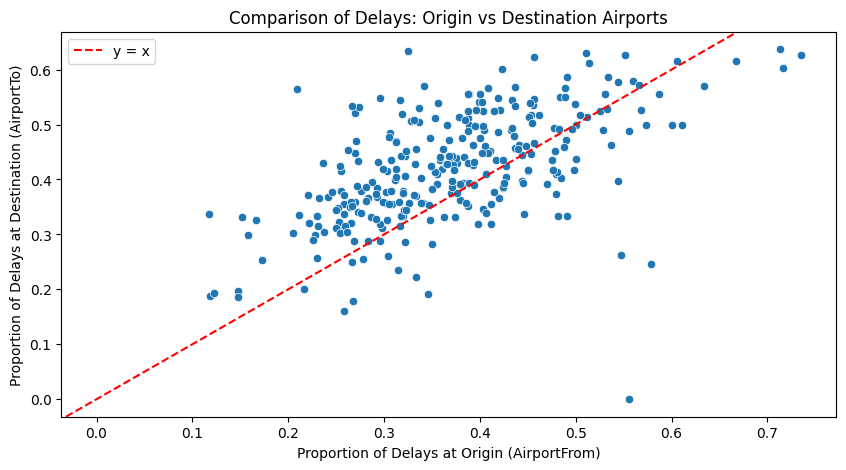

In [22]:
# Delay proportions by AirportFrom and AirportTo
airport_from_delay = copy_eda.groupby('AirportFrom')['Delay'].mean()
airport_to_delay = copy_eda.groupby('AirportTo')['Delay'].mean()

# Combine results into a single DataFrame
comparison = pd.DataFrame({
    'From_Delay': airport_from_delay,
    'To_Delay': airport_to_delay
}).dropna()

# Scatter plot
plt.figure(figsize=(10, 5))
sns.scatterplot(x=comparison['From_Delay'], y=comparison['To_Delay'])

plt.title('Comparison of Delays: Origin vs Destination Airports')
plt.xlabel('Proportion of Delays at Origin (AirportFrom)')
plt.ylabel('Proportion of Delays at Destination (AirportTo)')
plt.axline((0, 0), slope=1, color='red', linestyle='--', label='y = x')
plt.legend()
plt.show()

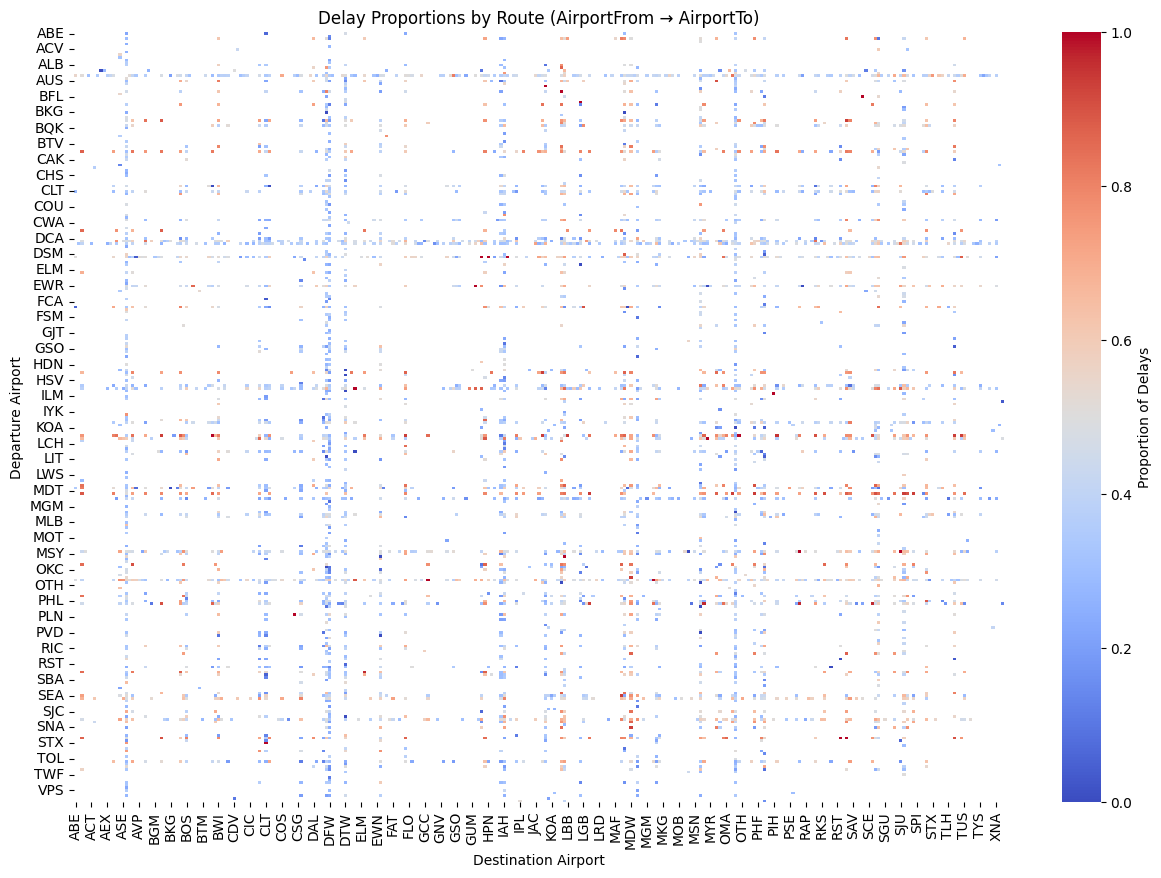

In [23]:
airport_pair_delays = copy_eda.groupby(['AirportFrom', 'AirportTo'])['Delay'].mean().unstack()

plt.figure(figsize=(15, 10))
sns.heatmap(airport_pair_delays, cmap="coolwarm", cbar_kws={'label': 'Proportion of Delays'})
plt.title("Delay Proportions by Route (AirportFrom → AirportTo)")
plt.xlabel("Destination Airport")
plt.ylabel("Departure Airport")
plt.show()

#### Time

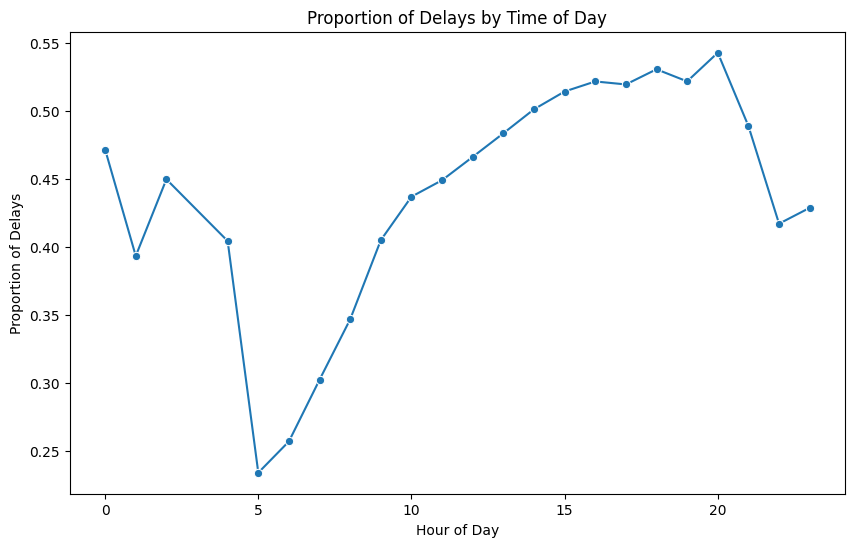

count    23.000000
mean      0.438239
std       0.085999
min       0.233678
25%       0.404358
50%       0.449438
75%       0.507444
max       0.542494
Name: Delay, dtype: float64


In [24]:
copy_eda['Hour'] = (copy_eda['Time'] // 60)  # Convert minutes to hours
time_delay = copy_eda.groupby('Hour')['Delay'].mean()
plt.figure(figsize=(10, 6))
sns.lineplot(x=time_delay.index, y=time_delay.values, marker='o')
plt.title("Proportion of Delays by Time of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Proportion of Delays")
plt.show()

print(time_delay.describe())

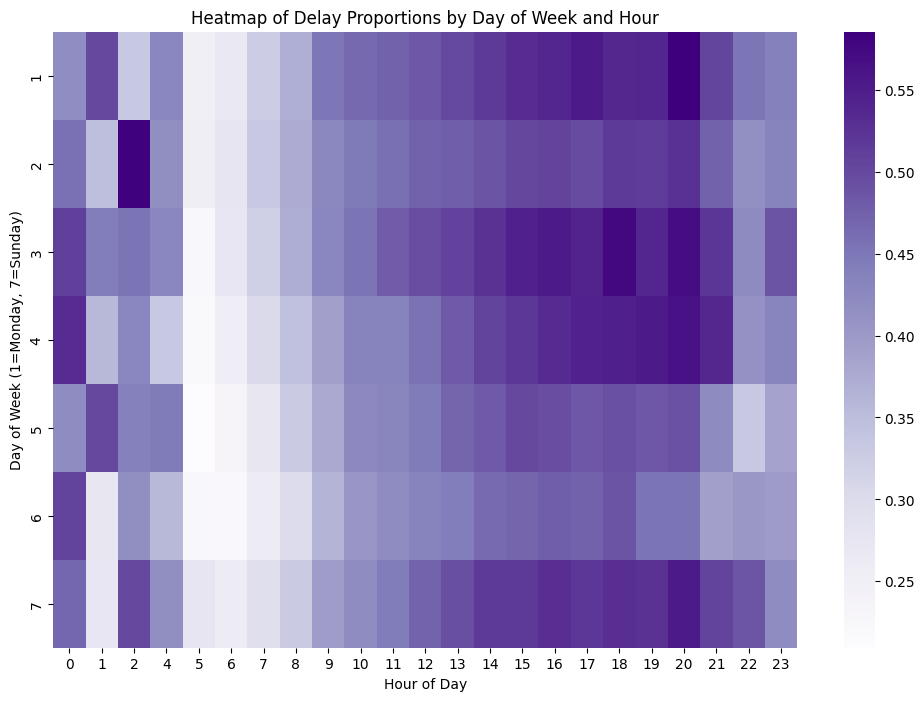

In [25]:
heatmap_data = copy_eda.groupby(['DayOfWeek', 'Hour'])['Delay'].mean().unstack()

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="Purples", annot=False)
plt.title("Heatmap of Delay Proportions by Day of Week and Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week (1=Monday, 7=Sunday)")
plt.show()

#### Length

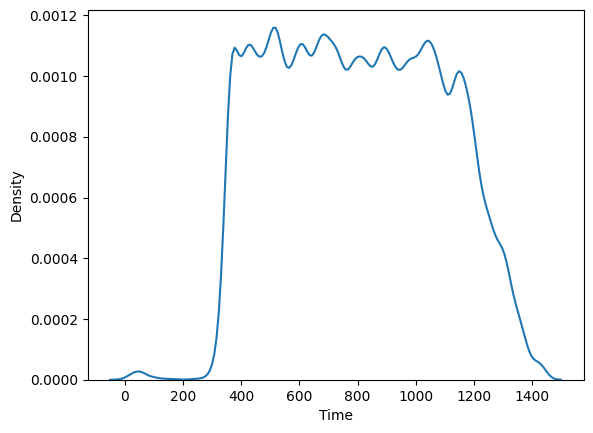

In [26]:
sns.kdeplot(copy_eda, x='Time')
plt.show()

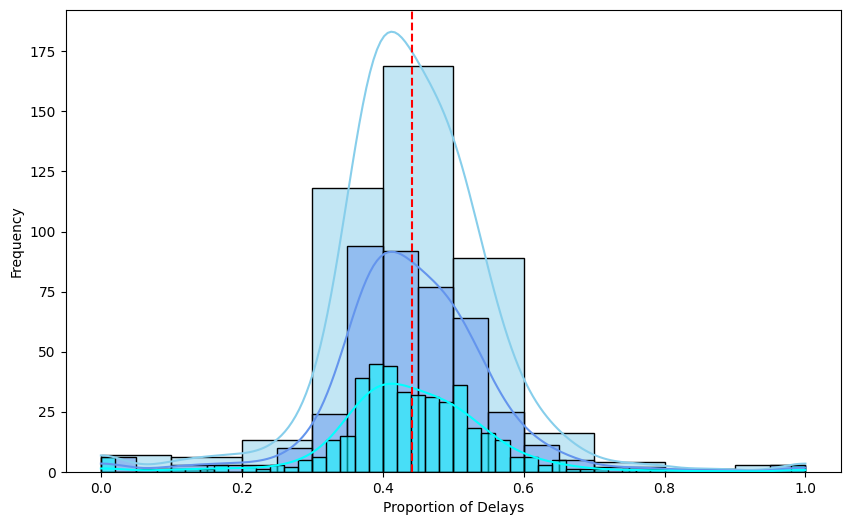

In [27]:
# Proportion of delays by length
length_delay = copy_eda.groupby('Length')['Delay'].mean()  
plt.figure(figsize=(10, 6))
sns.histplot(length_delay, kde=True, bins=10, color='skyblue')
sns.histplot(length_delay, kde=True, bins=20, color='cornflowerblue')
sns.histplot(length_delay, kde=True, bins=50, color='aqua')

# Vertical line for arithmetic mean of flight_delays
plt.axvline(length_delay.mean(), 0, 2000, color='Red', linestyle = "dashed")
plt.xlabel("Proportion of Delays")
plt.ylabel("Frequency")
plt.show()

## Correlation
The .corr() method in Pandas computes the pairwise correlation between the columns of a dataset. <br>
Correlation measures the strength and direction of a linear relationship between numerical variables.
references: <br>
pd.correlation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html#pandas.DataFrame.corr <br>
sns.heatmap: https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap <br>

In [28]:
# Encode labels
label_encoder = preprocessing.LabelEncoder()
copy_eda["Airline"] = label_encoder.fit_transform(copy_eda["Airline"])
copy_eda["AirportFrom"] = label_encoder.fit_transform(copy_eda["AirportFrom"])
copy_eda["AirportTo"] = label_encoder.fit_transform(copy_eda["AirportTo"])

# display data
copy_eda.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,Hour
0,1,4,269,253,135,3,15,205,1,0
1,2,14,1558,217,60,3,15,222,1,0
2,3,1,2400,154,80,3,20,165,1,0
3,4,1,2466,253,80,3,20,195,1,0
4,5,2,108,14,252,3,30,202,0,0


<Axes: >

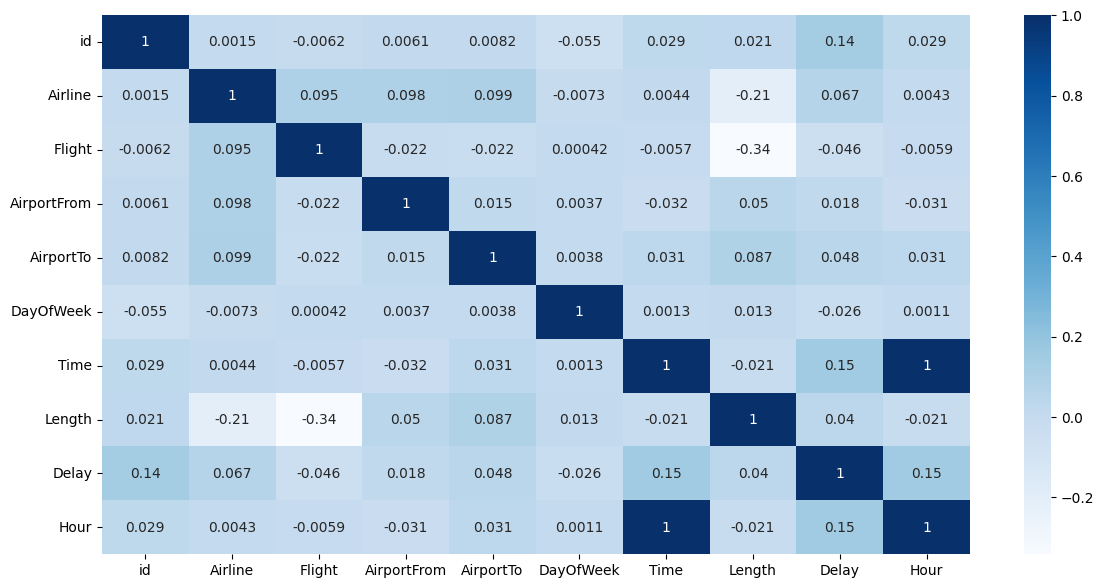

In [29]:
correlation = copy_eda.corr(method='pearson')
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'Blues')

<b>Result </b>: No strong linear correlation between delay and all the other columns

# Training Models

## Ordinal Encoder
Preprocess using an OrdinalEncoder on the categorical features

In [30]:
copy_ordinal = df.copy()
features_categorical = copy_ordinal[['Airline', 'AirportFrom', 'AirportTo']]
features_numerical = copy_ordinal[['DayOfWeek', 'Time', 'Length']]
target = copy_ordinal['Delay']

#Preprocessing
encoder = preprocessing.OrdinalEncoder()
features_categorical = pd.DataFrame(
    encoder.fit_transform(features_categorical), 
    columns=encoder.get_feature_names_out())

scaler = MinMaxScaler()
features_numerical = pd.DataFrame(
    scaler.fit_transform(features_numerical),
    columns=scaler.get_feature_names_out())

#Join Dataframes
features = features_categorical.join(features_numerical)
print(features)

        Airline  AirportFrom  AirportTo  DayOfWeek      Time    Length
0           4.0        253.0      135.0   0.333333  0.003499  0.312977
1          14.0        217.0       60.0   0.333333  0.003499  0.338931
2           1.0        154.0       80.0   0.333333  0.006998  0.251908
3           1.0        253.0       80.0   0.333333  0.006998  0.297710
4           2.0         14.0      252.0   0.333333  0.013996  0.308397
...         ...          ...        ...        ...       ...       ...
539378      4.0        203.0      264.0   0.666667  1.000000  0.497710
539379      8.0        252.0       16.0   0.666667  1.000000  0.465649
539380      8.0        253.0      184.0   0.666667  1.000000  0.389313
539381     13.0        128.0      253.0   0.666667  1.000000  0.477863
539382     14.0        154.0      216.0   0.666667  1.000000  0.459542

[539383 rows x 6 columns]


In [31]:
# Split the dataset (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)
y_train = y_train.values.ravel()
depths = [['Depth', 'Accuracy']]

### Decision Tree Model

Simple Decision Tree Model with different depths 

In [ ]:
# Train a decision tree classifier
for depth in range(1, 51):
    clf = DecisionTreeClassifier(random_state=42, max_depth=depth)
    clf.fit(X_train, y_train)

    # Plot the decision tree
    #plt.figure(figsize=(20, 10))  # Adjust figure size for readability
    #plot_tree(clf, filled=True, feature_names=features.columns, class_names=["No Delay", "Delay"])
    #plt.title("Decision Tree")
    #plt.show()

    # Making Predictions
    y_pred = clf.predict(X_test)

    # Evaluating the Model
    accuracy = accuracy_score(y_test, y_pred)

    #print('Depth:', depth, f"Accuracy: {accuracy:.2f}")
    #print("\nClassification Report:")
    #print(classification_report(y_test, y_pred))
    depths.append([depth, accuracy])
depths = pd.DataFrame(depths[1:], columns=depths[0])
depths.head()

In [ ]:
# find depth with highest accuracy
max_row = depths.loc[depths['Accuracy'].idxmax()]
print(max_row)

# plot accuracies
sns.lineplot(depths, x='Depth', y='Accuracy')
plt.show()

### GridSearchCV
GridSearchCV is the process of performing hyperparameter tuning in order to determine the optimal values for a given model

<br>Hyperparameters tested
- `max_depth`: limiting depth prevents overfitting
- `min_samples_split`: control splits with very few samples in large datasets
- `min_samples_leaf`: Ensures a minimum number of samples per leaf
- `criterion`: Test different split criteria for performance
- `max_features`: Reducing features considered at splits may improve generalization
- `class_weight`: test data seems balanced

In [ ]:
# Hyperparameter grid
param_grid = {
    'max_depth': range(20, 51),
    'min_samples_split': [2, 10, 50, 100],
    'min_samples_leaf': [1, 5, 10, 50],
    'criterion': ['gini', 'entropy'],
    'max_features': [None, 'sqrt', 'log2'],
}

# Initialize the DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)

# GridSearchCV
grid_search = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    scoring='accuracy',  # Optimize for accuracy
    cv=5,  # 5-fold cross-validation
    verbose=2, # information printed (0: none)
    n_jobs=-1  # Use all available cores
)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Output the best parameters and accuracy
print("Best parameters:", grid_search.best_params_)
print("Best cross-validated accuracy:", grid_search.best_score_)

### KNN Model

In [ ]:
knn = [['Neighbors', 'Accuracy']]
for n_neighbors in range(1,101):
    knn_estimator = KNeighborsClassifier(n_neighbors)
    knn_estimator.fit(X_train, y_train)
    prediction = knn_estimator.predict(X_test)
    knn.append([n_neighbors, accuracy_score(y_test, prediction)])
    #print(f"k= {n_neighbors} acc: {accuracy_score(y_test, prediction)}")

knn = pd.DataFrame(knn[1:], columns=knn[0])
knn.head()

In [ ]:
# Find best accuracy
max_row = knn.loc[knn['Accuracy'].idxmax()]
print(max_row)

sns.lineplot(knn, x='Neighbors', y='Accuracy')
plt.show()

## One-Hot-Encoder
Preprocess using an One-Hot-encoder

In [3]:
# Copy dataset
copy_onehot = df.copy()
features_categorical = copy_onehot[['Airline', 'AirportFrom', 'AirportTo']]
features_numerical = copy_onehot[['DayOfWeek', 'Time', 'Length']]
target= copy_onehot[['Delay']]

# One-hot encoding
encoder = OneHotEncoder(sparse_output=False)
encoded_categorical = encoder.fit_transform(features_categorical)

# Scaling numerical features
scaler = MinMaxScaler()
scaled_numerical = scaler.fit_transform(features_numerical)

# Combining arrays directly
combined_features = np.hstack([encoded_categorical, scaled_numerical])

# Create DataFrame with proper column names
features = pd.DataFrame(
    combined_features, 
    columns=list(encoder.get_feature_names_out(['Airline', 'AirportFrom', 'AirportTo'])) + list(features_numerical.columns)
)

# Display a sample
features.head()

,Airline_9E,Airline_AA,Airline_AS,Airline_B6,Airline_CO,Airline_DL,Airline_EV,Airline_F9,Airline_FL,Airline_HA,...,AirportTo_UTM,AirportTo_VLD,AirportTo_VPS,AirportTo_WRG,AirportTo_XNA,AirportTo_YAK,AirportTo_YUM,DayOfWeek,Time,Length
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.003499,0.312977
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.003499,0.338931
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.006998,0.251908
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.006998,0.297710
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.013996,0.308397


In [5]:
# Split the dataset (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)
y_train = y_train.values.ravel()

### Decision Tree Model

Simple Decision Tree, only test for depth

In [ ]:
depths = [['Depth', 'Accuracy']]
# Train a decision tree classifier
for depth in range(1, 51):
    clf = DecisionTreeClassifier(random_state=42, max_depth=depth)
    clf.fit(X_train, y_train)

    # Making Predictions
    y_pred = clf.predict(X_test)

    # Evaluating the Model
    accuracy = accuracy_score(y_test, y_pred)
    depths.append([depth, accuracy])
    
depths = pd.DataFrame(depths[1:], columns=depths[0])
depths.head()

In [ ]:
max_row = depths.loc[depths['Accuracy'].idxmax()]
print(max_row)

sns.lineplot(depths, x='Depth', y='Accuracy')
plt.show()

Hyperparameter Tuning with GridSearchCV

In [ ]:
# Hyperparameter grid
param_grid = {
    'max_depth': range(1, 51),
    'min_samples_split': [2, 10, 50, 100],
    'min_samples_leaf': [1, 5, 10, 50],
    'criterion': ['gini', 'entropy'],
}

# Initialize the DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)

# GridSearchCV
grid_search = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    scoring='accuracy',  # Optimize for accuracy
    cv=5,  # 5-fold cross-validation
    verbose=2, # information printed (0: none)
    n_jobs=-1  # Use all available cores
)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Output the best parameters and accuracy
print("\nBest parameters:", grid_search.best_params_)
print("Best cross-validated accuracy:", grid_search.best_score_)

### KNN
Took 26 minutes -_-

In [ ]:
#knn = [['Neighbors', 'Accuracy']]
#knn_estimator = KNeighborsClassifier(32)
#knn_estimator.fit(X_train, y_train)
#prediction = knn_estimator.predict(X_test)
#print(accuracy_score(y_test, prediction))

### Random Forest
Try out RandomizedSearchCV instead of a GridSearchCV, may be more efficient. Or not.

In [17]:
# Hyperparameter grid
param_dist = {
    'n_estimators': range(100, 1000),
    'max_depth': range(10, 31),
    'min_samples_split': range(2, 20),
    'min_samples_leaf': range(1, 20),
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42)
scoring_metrics = ['accuracy', 'roc_auc', 'f1', 'precision']

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    scoring='accuracy',  # Optimize for accuracy
    cv=5,  # 5-fold cross-validation
    verbose=2, # information printed (0: none)
    n_jobs=-1,  # Use all available cores
    random_state=42
)

# Fit the grid search
random_search.fit(X_train, y_train)

# Output the best parameters and accuracy
print("\nBest parameters:", random_search.best_params_)
print("Best cross-validated accuracy:", random_search.best_score_)
print("Best cross-validated ROC AUC:", random_search.cv_results_['mean_test_roc_auc'][random_search.best_index_])
print("Best cross-validated F1 score:", random_search.cv_results_['mean_test_f1'][random_search.best_index_])
print("Best cross-validated Precision:", random_search.cv_results_['mean_test_precision'][random_search.best_index_])

Fitting 5 folds for each of 10 candidates, totalling 50 fits


python(72206) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(72207) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(72208) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(72209) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(72210) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(72211) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(72212) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(72213) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


KeyboardInterrupt: 